**Dataset Description**

There are two datasets that provides information on samples of red and white variants of the Portuduese "Vinho Verde" wine. Each sample of wine was rated for quality wine experts and examined with physicochemical tests. Data is originaly from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

**Columns Description** 

1.  `fixed acidity`: concentration of non-volatile acids in wine, such as tartaric, malic, and citric acids.
2.  `volatile acidity`: amount of volatile acids in the wine, primarily acetic acid.
3.  `citric acid`: concentration of citric acid in the wine, which can add freshness and flavor.	
4.  `residual sugar`: amount of sugar remaining after fermentation stops.
5.  `chlorides`: amount of salt in the wine.	
6.  `free sulfur dioxide`: free form of SO2 in wine, which prevents microbial growth and oxidation. 
7.  `total sulfur dioxide`: total amount of SO2 in the wine(free + bound forms).	
8.  `density`: density of wine ,which is close to that of water depending on alcohol and sugar content.	
9.  `pH`: measure of wine's acidity or basicity on a scale from 0(very acidic) to 14(very basic).
10. `sulphates`: amount of sulphates in wine, which can contribute to sulfur dioxide gas levels.	
11. `alcohol`: The percentage of alcohol content in wine.	
12. `quality`: score between 0 and 10 rating the overall quality of the wine.


**EDA Questions**

- Q1: What chemical characteristics are most important in predicting the quality of wine?
- Q2: Is a certain type of wine(red or white) associated with higher quality?
- Q3: Do wine with higher alcohol content receive better ratings?
- Q4: Do sweeter wines(more residual sugar) receive better ratings?
- Q5: What level of acidity(pH) is associated with the highest quality?

**Environment Set-up**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Wrangling**

Data wrangling is the process of cleaning, transforming, and preparing data for analysis. 

Here, we'd load our data from the CSV file, and dive deeper into it to check for any required cleaning steps.

In [55]:
# Loading red wine data and viewing head

red_wine = pd.read_csv('wineQualityReds.csv')
red_wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
# Loading white wine data and viewing head

white_wine = pd.read_csv('wineQualityWhites.csv')
white_wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [58]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed.acidity         4898 non-null   float64
 2   volatile.acidity      4898 non-null   float64
 3   citric.acid           4898 non-null   float64
 4   residual.sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free.sulfur.dioxide   4898 non-null   float64
 7   total.sulfur.dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [59]:
# Count number of distinct elements in specified axis.Count non-NA cells for each column or row.
red_wine.nunique()

Unnamed: 0              1599
fixed.acidity             96
volatile.acidity         143
citric.acid               80
residual.sugar            91
chlorides                153
free.sulfur.dioxide       60
total.sulfur.dioxide     144
density                  436
pH                        89
sulphates                 96
alcohol                   65
quality                    6
dtype: int64

In [60]:
white_wine.nunique()

Unnamed: 0              4898
fixed.acidity             68
volatile.acidity         125
citric.acid               87
residual.sugar           310
chlorides                160
free.sulfur.dioxide      132
total.sulfur.dioxide     251
density                  890
pH                       103
sulphates                 79
alcohol                  103
quality                    7
dtype: int64

In [61]:
# Return boolean Series denoting duplicate rows.
print(red_wine.duplicated().sum(),white_wine.duplicated().sum())

0 0


**Exploration Summary**

- Red wine dataframe consists of 1599 records and 13 attributes, while white wine dataframe consists of 4898 records and same attributes.
- Both dataframes has no NaNs nor duplicated values.
- We would combine both dataframes and append a new categorical column to indicate the wine color for better analysis.
- Columns data types are consistant.
- `Unnamed: 0` column would be dropped.

**Data Cleaning**


In [62]:
# Appending new color column and merging dataframes

# Create color arrary for red dataframe

color_red = np.repeat('Red',red_wine.shape[0])
red_wine['color'] = color_red
red_wine.head()


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [63]:
# Create color array for white dataframe

color_white = np.repeat('White',white_wine.shape[0])
white_wine['color'] = color_white
white_wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [64]:
# Append dataframes and confirm changes

wine = pd.concat([red_wine,white_wine], axis=0,ignore_index=True)
wine

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4894,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,4895,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,4896,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,4897,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [65]:
wine.duplicated().sum()

0

In [66]:
# Casting color columns and confirming changes

wine['color'] = wine['color'].astype('category')
wine['color'].dtype

CategoricalDtype(categories=['Red', 'White'], ordered=False, categories_dtype=object)

**Dropping `Unnamed: 0` column**

In [67]:
# Dropping column and confirming changes
wine.drop('Unnamed: 0', axis=1, inplace=True)
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [68]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed.acidity         6497 non-null   float64 
 1   volatile.acidity      6497 non-null   float64 
 2   citric.acid           6497 non-null   float64 
 3   residual.sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free.sulfur.dioxide   6497 non-null   float64 
 6   total.sulfur.dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  color                 6497 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


In [69]:
wine.to_csv('wine.csv',index=False)

**Data Visualization and EDA**

In [70]:
# Setting up seaborn configuration
sns.set_style('whitegrid')

Q1. What chemical characteristics are most important in predicating the quality of wine? 

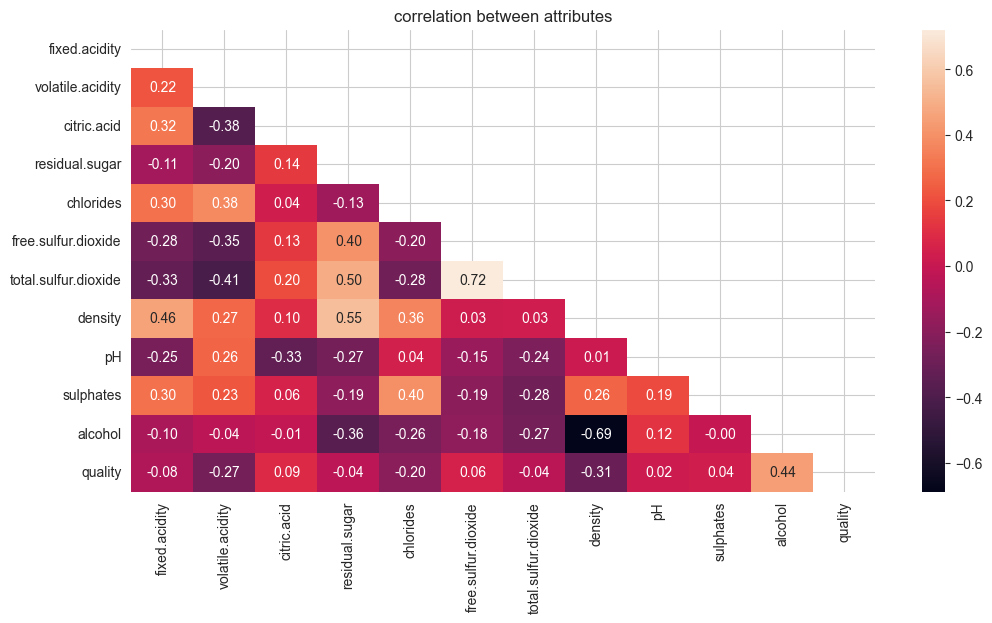

In [71]:
plt.figure(figsize=(12,6))
# Select only numeric columns for correlation
numeric_columns= wine.select_dtypes(include=[np.number]).columns
corr = wine[numeric_columns].corr()
mask = np.triu(corr)
sns.heatmap(corr,annot=True, mask=mask,fmt='.2f')
plt.title("correlation between attributes")
plt.show()

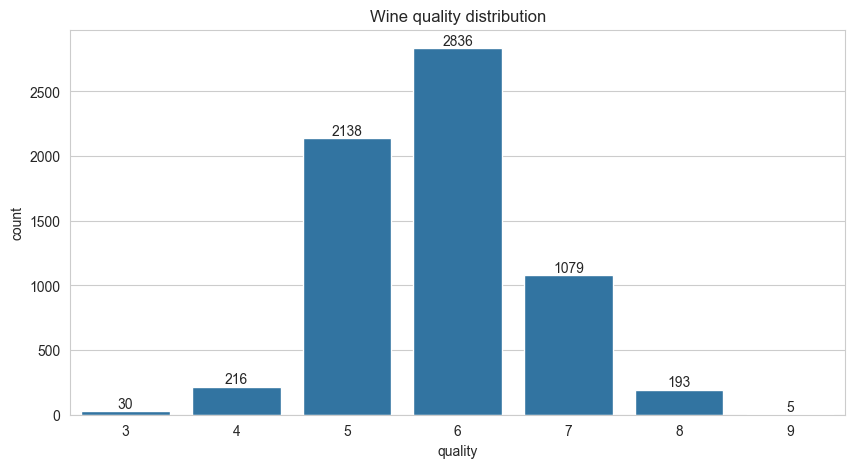

In [72]:
figure = plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'quality', data=wine)
plt.title('Wine quality distribution')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

- The vast majority of the wine has a quality of 6, while less numbers has a quality of 9.


Q2: Is a certain type of wine(red or white) associated with higher quality?

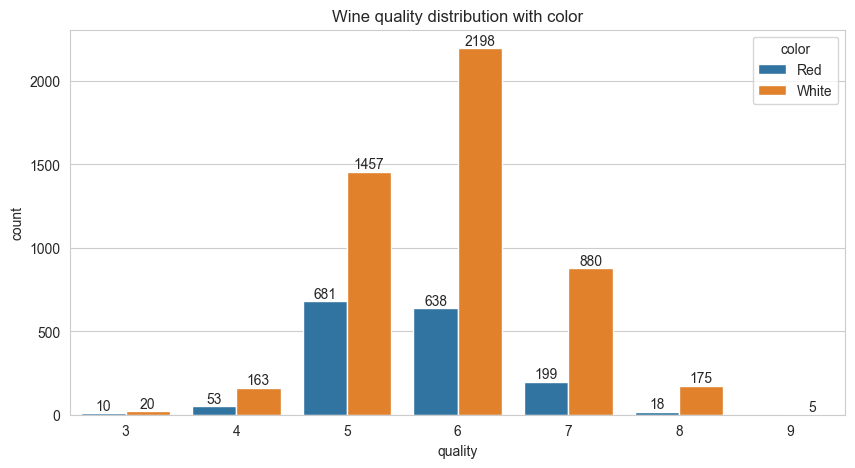

In [73]:
figure = plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'quality',hue='color',data=wine)
plt.title('Wine quality distribution with color')
ax.bar_label(ax.containers[0],label_type='edge')
ax.bar_label(ax.containers[1],label_type='edge')
plt.show()

- There is noticable deviation between white and red wine counts.
- Most of the white wine has a `quality` score of 6, while most of the red wine has a `quality` score of 5, this clearly shows that white wine is more likable.

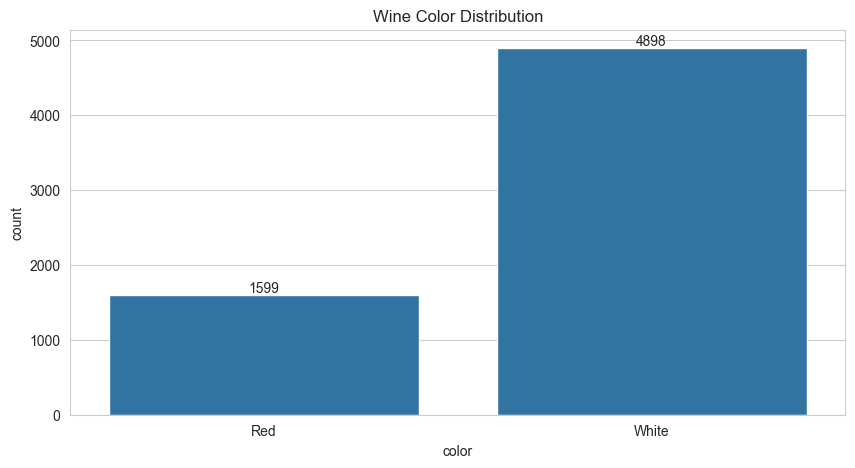

In [74]:
# Plotting wine color distribustion
figure = plt.figure(figsize=(10,5))
ax = sns.countplot(x='color',data=wine)
plt.title('Wine Color Distribution')
ax.bar_label(ax.containers[0],label_type='edge')
plt.show()

- We can notice that white wine forms the vast majority of our dataset, with 85.7% of the data points belonging to this category. 

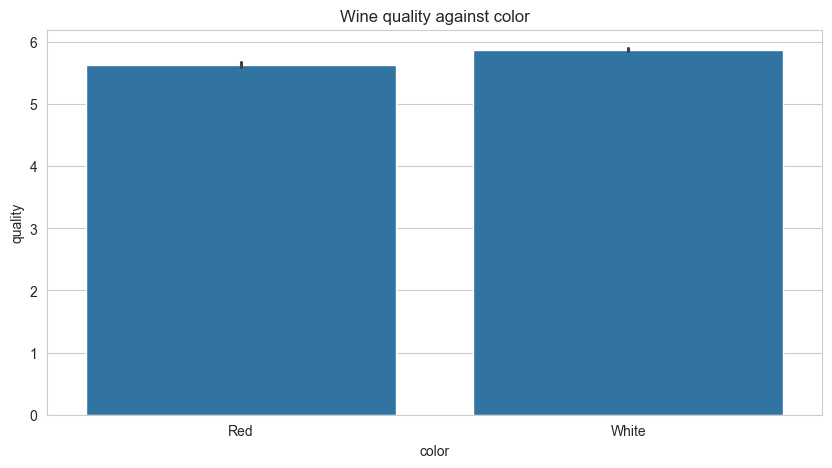

In [75]:
figure = plt.figure(figsize=(10,5))
ax = sns.barplot(x='color',y='quality',data=wine)
plt.title('Wine quality against color')
plt.show()

In [76]:
wine.groupby('color')['quality'].mean()

C:\Users\dhana\AppData\Local\Temp\ipykernel_2920\716934276.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine.groupby('color')['quality'].mean()


color
Red      5.636023
White    5.877909
Name: quality, dtype: float64

- The mean quality score of red and white wine are very close.
- The mean quality score of white wine is higher than that of red wine.


Q3: Do wines with higher alcoholic content receive better ratings?

In [77]:
wine['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

- We have the hghest alcohol content at 14.9.
- Mean alcoholic content is around 10.4.

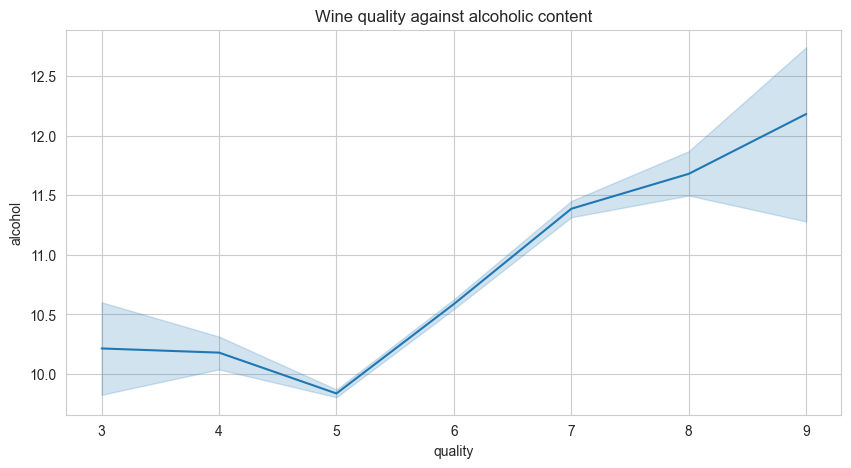

In [78]:
# Plotting alcohol and quality
figure =plt.figure(figsize=(10,5))
ax = sns.lineplot(x='quality', y='alcohol',data=wine)
plt.title('Wine quality against alcoholic content')
plt.show()

- Most of our dataset that has a quality score of 6 appears to have relatively low alcoholic content, but it still above the mean.
- High alcoholic content only appears in our dataset with high quality wine.

Q4. Do sweeter wines(more residual sugar) recieve better ratings?

In [79]:
wine['residual.sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual.sugar, dtype: float64

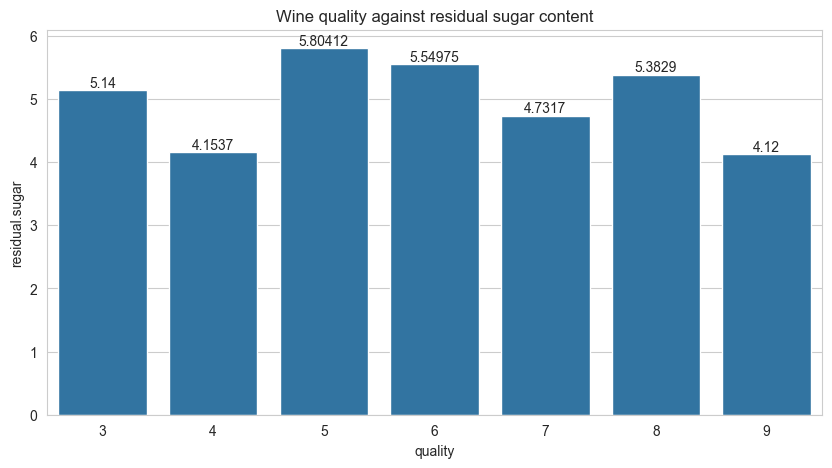

In [80]:
# Plotting alcohol and quality
figure = plt.figure(figsize=(10,5))
ax = sns.barplot(x='quality', y='residual.sugar',data=wine,errorbar=None)
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Wine quality against residual sugar content')
plt.show()

- We can see that the highest sugar content is tied to a quality of 5, while lower the sugar content appears to have respectively higher quality.

Q5: What level of acidity (pH) is associated with the highest quality?

In [81]:
def categorize_col(df,col,labels):
    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col],edges,labels = labels, duplicates='drop')
    return df

In [82]:
# define pH labels
labels = ['High','Average','BelowAverage','Low']

# define pH values
categorize_col(wine,'pH',labels)
wine['pH'].dtype

CategoricalDtype(categories=['High', 'Average', 'BelowAverage', 'Low'], ordered=True, categories_dtype=object)

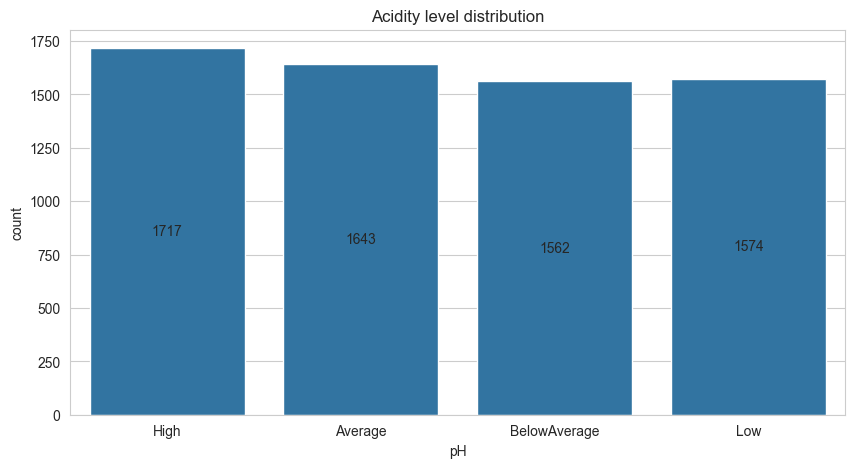

In [83]:
# Plotting acidity distribution
figure = plt.figure(figsize=(10,5))
ax = sns.countplot(x='pH', data=wine)
ax.bar_label(ax.containers[0],label_type='center')
plt.title('Acidity level distribution')
plt.show()

- Most of the wine in our dataset has high acidity level

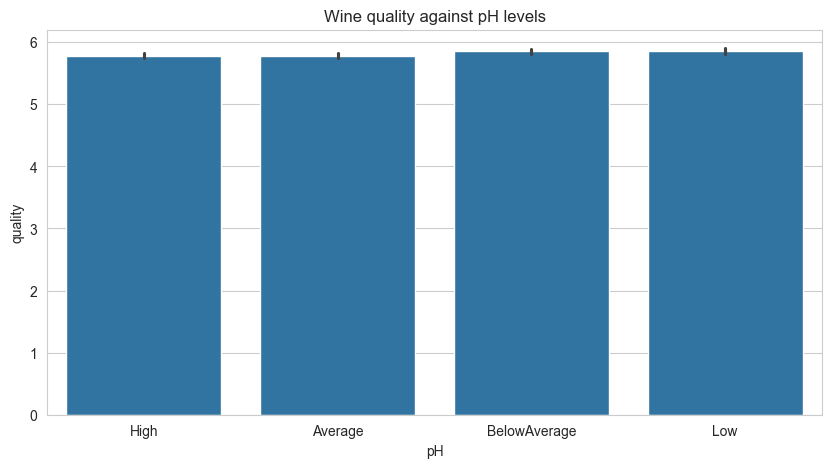

In [84]:
# plotting quality against acidity levels in pH
figure = plt.figure(figsize=(10, 5))
ax = sns.barplot(x = 'pH',y='quality',data=wine)
plt.title('Wine quality against pH levels')
plt.show()

In [85]:
wine.groupby('pH')['quality'].mean()

C:\Users\dhana\AppData\Local\Temp\ipykernel_2920\2823388591.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine.groupby('pH')['quality'].mean()


pH
High            5.783343
Average         5.784540
BelowAverage    5.850832
Low             5.859593
Name: quality, dtype: float64

- It looks clear that all four acidic level has close average quality score, but low acidic level has the highest quality score in dataset.